In [1]:
library(bigsnpr)
library(bigreadr)

Loading required package: bigstatsr



In [2]:
NCORES <- nb_cores()

## Information for the variants provided in the LD reference
map_ldref <- readRDS("/mnt/stsi/stsi1/ptseng/LD_ref_European_privefl/map.rds")

# Read external summary statistics
print('Loading summary statistics...')
sumstats <- bigreadr::fread2("/gpfs/home/ptseng/Torkamani_Projects/20210712_Analysis-RegeniePaper/exBTs_regenie_phenoCol1_SPA_CADComp.regenie.stats")
names(sumstats) <- c("chr", "pos", "rsid", "a0", "a1", "a1_freq", "info", "n_eff", "test", "beta", "beta_se", "chi_sq", "log_p")
#str(sumstats)
print('Done')

[1] "Loading summary statistics..."
[1] "Done"


In [3]:
map_ldref <- readRDS("/mnt/stsi/stsi1/ptseng/LD_ref_European_privefl/map.rds")

In [4]:
info_snp <- snp_match(sumstats, map_ldref)
# 11,792,542 variants to be matched.
# 0 ambiguous SNPs have been removed.
# 1,054,287 variants have been matched; 0 were flipped and 0 were reversed.
info_snp <- tidyr::drop_na(tibble::as_tibble(info_snp))

11,477,146 variants to be matched.

0 ambiguous SNPs have been removed.

1,054,139 variants have been matched; 0 were flipped and 0 were reversed.



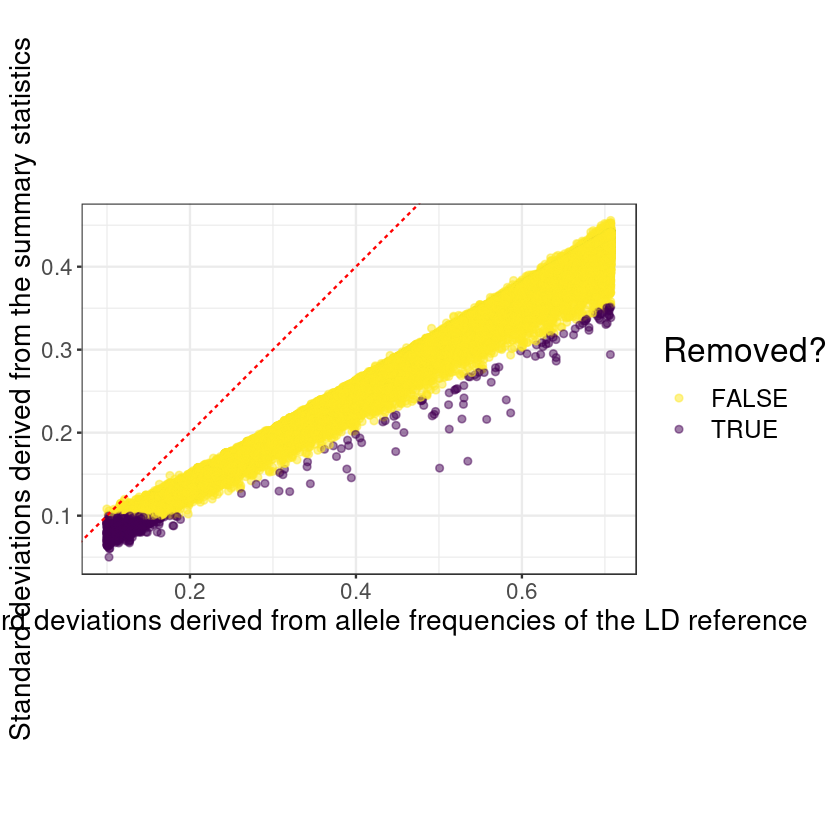

In [5]:
sd_ldref <- with(info_snp, sqrt(2 * af_UKBB * (1 - af_UKBB)))
sd_ss <- with(info_snp, 2 / sqrt(n_eff * beta_se^2))

is_bad <-
  sd_ss < (0.5 * sd_ldref) | sd_ss > (sd_ldref + 0.1) | sd_ss < 0.1 | sd_ldref < 0.05

library(ggplot2)
qplot(sd_ldref, sd_ss, color = is_bad, alpha = I(0.5)) +
  theme_bigstatsr() +
  coord_equal() +
  scale_color_viridis_d(direction = -1) +
  geom_abline(linetype = 2, color = "red") +
  labs(x = "Standard deviations derived from allele frequencies of the LD reference",
       y = "Standard deviations derived from the summary statistics",
       color = "Removed?")

df_beta <- info_snp[!is_bad, ]

In [6]:
sumstats

chr,pos,rsid,a0,a1,a1_freq,info,n_eff,test,beta,beta_se,chi_sq,log_p
<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,10177,rs367896724,A,AC,0.40078300,0.467935,487275,ADD,-0.007136390,0.00968069,0.543431000,0.33628600
1,10352,rs201106462,T,TA,0.39461900,0.447900,487275,ADD,0.007334210,0.00994752,0.543596000,0.33635000
1,10616,1:10616_CCGCCGTTGCAAAGGCGCGCCG_C,CCGCCGTTGCAAAGGCGCGCCG,C,0.99416700,0.468135,487275,ADD,-0.060651900,0.06204040,0.955738000,0.48377800
1,11008,rs575272151,C,G,0.08659200,0.495022,487275,ADD,-0.011910500,0.01643370,0.525277000,0.32919800
1,11012,rs544419019,C,G,0.08659200,0.495022,487275,ADD,-0.011910500,0.01643370,0.525277000,0.32919800
1,13110,rs540538026,G,A,0.05723740,0.391826,487275,ADD,-0.002173510,0.02227290,0.009522960,0.03514600
1,13116,rs62635286,T,G,0.18512400,0.406244,487275,ADD,0.007242970,0.01316910,0.302499000,0.23483800
1,13118,rs62028691,A,G,0.18512400,0.406244,487275,ADD,0.007242970,0.01316910,0.302499000,0.23483800
1,13273,rs531730856,G,C,0.13214700,0.390799,487275,ADD,-0.013734800,0.01538110,0.797382000,0.42960100


In [7]:
head(info_snp)

chr,pos,a0,a1,rsid.ss,a1_freq,info,n_eff,test,beta,⋯,chi_sq,log_p,_NUM_ID_.ss,rsid,af_UKBB,ld,pos_hg17,pos_hg18,pos_hg38,_NUM_ID_
<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
1,752721,A,G,rs3131972,0.826240,1.000000,487275,ADD,-0.008524400,⋯,0.90497200,0.4666700,463,rs3131972,0.8406243,3.687146,792584,742584,817341,1
1,754182,A,G,rs3131969,0.857263,0.990838,487275,ADD,-0.005653340,⋯,0.34964100,0.2562420,473,rs3131969,0.8703727,3.728623,794045,744045,818802,2
1,760912,C,T,rs1048488,0.829588,0.990920,487275,ADD,-0.007790820,⋯,0.76236000,0.4172650,529,rs1048488,0.8401589,3.688378,800775,750775,825532,3
1,768448,G,A,rs12562034,0.111266,1.000000,487275,ADD,0.000509008,⋯,0.00243212,0.0174271,557,rs12562034,0.1060044,1.400241,808311,758311,833068,4
1,779322,A,G,rs4040617,0.136564,1.000000,487275,ADD,0.004130860,⋯,0.18626200,0.1764960,607,rs4040617,0.1279587,3.680956,819185,769185,843942,5
1,838555,C,A,rs4970383,0.251295,1.000000,487275,ADD,0.002599250,⋯,0.12047500,0.1375580,838,rs4970383,0.2452252,3.567197,878418,828418,903175,6


In [ ]:
tmp <- tempfile(tmpdir = "tmp-data")

for (chr in 1:22) {

  cat(chr, ".. ", sep = "")

  ## indices in 'df_beta'
  ind.chr <- which(df_beta$chr == chr)
  ## indices in 'map_ldref'
  ind.chr2 <- df_beta$`_NUM_ID_`[ind.chr]
  ## indices in 'corr_chr'
  ind.chr3 <- match(ind.chr2, which(map_ldref$chr == chr))

  corr_chr <- readRDS(paste0("/mnt/stsi/stsi1/ptseng/LD_ref_European_privefl/LD_chr", chr, ".rds"))[ind.chr3, ind.chr3]

  if (chr == 1) {
    corr <- as_SFBM(corr_chr, tmp)
  } else {
    corr$add_columns(corr_chr, nrow(corr))
  }
}

In [9]:
corr_chr <- readRDS(paste0("/mnt/stsi/stsi1/ptseng/LD_ref_European_privefl/LD_chr", 1, ".rds"))
str(corr_chr)

Formal class 'dsCMatrix' [package "Matrix"] with 7 slots
  ..@ i       : int [1:98546129] 0 0 1 0 1 2 0 1 2 3 ...
  ..@ p       : int [1:87146] 0 1 3 6 10 15 21 28 36 45 ...
  ..@ Dim     : int [1:2] 87145 87145
  ..@ Dimnames:List of 2
  .. ..$ : NULL
  .. ..$ : NULL
  ..@ x       : num [1:98546129] 1 0.886 1 0.992 0.884 ...
  ..@ uplo    : chr "U"
  ..@ factors : list()


In [13]:
# Heritability estimation of LD score regression
# to be used as a starting value in LDpred2-auto
(ldsc <- with(df_beta, snp_ldsc(ld, ld_size = nrow(map_ldref),
                                chi2 = (beta / beta_se)^2,
                                sample_size = n_eff,
                                ncores = NCORES)))
#        int     int_se         h2      h2_se
# 1.09045635 0.01332333 0.12732974 0.01104159
h2_est <- ldsc[["h2"]]

int      int_se          h2       h2_se 
1.025135733 0.009350267 0.048574440 0.002665962

In [ ]:
# LDpred2-auto
multi_auto <- snp_ldpred2_auto(corr, df_beta, h2_init = h2_est,
                               vec_p_init = seq_log(1e-4, 0.9, 30),
                               ncores = NCORES)  # 13 hours
beta_auto <- sapply(multi_auto, function(auto) auto$beta_est)

In [18]:
write.csv(beta_auto,'ldpred2_output',row.names=FALSE)

In [19]:
write.csv(df_beta,'ldpred2_statsfile',row.names=FALSE)

In [ ]:
# Use your favorite tool (e.g. PLINK) to get the predictions 'pred_auto'
# corresponding to the vectors of effects in 'beta_auto', e.g. here I can do
library(bigsnpr)
ukb <- snp_attach("data/UKBB_imp_HM3.rds")
G <- ukb$genotypes
map <- dplyr::transmute(ukb$map,
                        chr = as.integer(chromosome), pos = physical.pos,
                        a0 = allele1, a1 = allele2)  # reversed somehow..
map_pgs <- df_beta[1:4]; map_pgs$beta <- 1
map_pgs2 <- snp_match(map_pgs, map)

load("data/ind_val_test.RData")
pred_auto <- big_prodMat(G, sweep(beta_auto, 1, map_pgs2$beta, '*'),
                         ind.row = ind.test,
                         ind.col = map_pgs2[["_NUM_ID_"]],
                         ncores = NCORES)

# Filter outlier predictions and average remaining ones -> your polygenic score
sc <- apply(pred_auto, 2, sd)
keep <- abs(sc - median(sc)) < 3 * mad(sc)
final_pred_auto <- rowMeans(pred_auto[, keep])

# Testing of final PGS
AUCBoot_no_NA <- function(pred, target) {
  is_not_na <- which(!is.na(target))
  AUCBoot(pred[is_not_na], target[is_not_na])
}
y <- readRDS("data/pheno/BRCA.rds")
AUCBoot_no_NA(final_pred_auto, y[ind.test])
#        Mean        2.5%       97.5%          Sd
# 0.655530387 0.650819295 0.660281045 0.002426852

# cleanup
file.remove(paste0(tmp, ".sbk"))

In [3]:
seq_log(1e-4, 0.9, 30)[c(20,21,22,23,24,25,26)]

[1] 0.03896822 0.05334133 0.07301582 0.09994710 0.13681174 0.18727360 0.25634789

In [4]:
784256/3000

[1] 261.4187